In [1]:
#%matplotlib widget
import cv2
import numpy as np
import matplotlib.pyplot as plt
import face_recognition
import os
import random


In [71]:
def heatmap_generator(image):
    face_locations = face_recognition.face_locations(image)

    # Load the pre-trained facial landmark model
    face_landmarks_list = face_recognition.face_landmarks(image, face_locations)

    h,w = image.shape[:2]
    lm = np.zeros([h,w])

    # Draw facial landmarks on the image
    for face_landmarks in face_landmarks_list:
        for landmark_type, landmarks in face_landmarks.items():
            for (x, y) in landmarks:
                if x < h and y < w :
                    lm[y,x] = 1

    heatmap = cv2.GaussianBlur(lm, [59,59], 3)         

    return heatmap

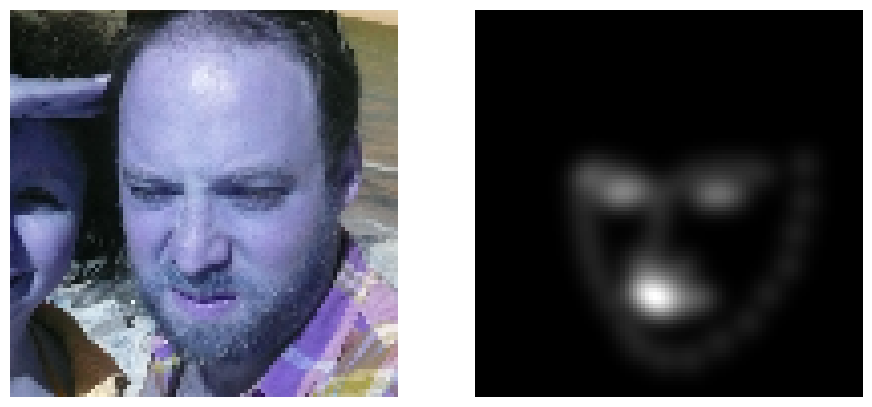

In [72]:
#The image path
image_path = "../datasets/AffectNet/disgust/ffhq_7.png"
image = cv2.imread(image_path)

heatmap = heatmap_generator(image)
heatmap = heatmap/heatmap.max()
plt.figure(figsize=[11,6])


plt.subplot(1,2,1)
plt.axis("off")
plt.imshow(image)

plt.subplot(1,2,2)
plt.axis("off")
plt.imshow(heatmap, cmap=plt.cm.gray)

In [73]:
path = '../datasets/AffectNet'
output_path = '../datasets/HeatMaps'

if not os.path.exists(output_path):
        os.makedirs(output_path)

folders = [f for f in os.listdir(path) if os.path.isdir(os.path.join(path, f))]
for folder in folders : 

    folder_path = path + '/' + folder
    images = [f for f in os.listdir(folder_path) if os.path.isfile(os.path.join(folder_path, f)) and (f.endswith('.jpg') or f.endswith('.png'))]

    if not os.path.exists(output_path + '/' + folder):
        os.makedirs(output_path + '/' + folder)

    for image_name in images :
        image_path = folder_path +'/' + image_name
        image = cv2.imread(image_path)

        heatmap = heatmap_generator(image)
        heatmap = heatmap/heatmap.max()

        out_HM = output_path + '/' + folder + '/' + image_name[:-4] + '.npy'
        np.save(out_HM, heatmap)





print(len(images))

1558


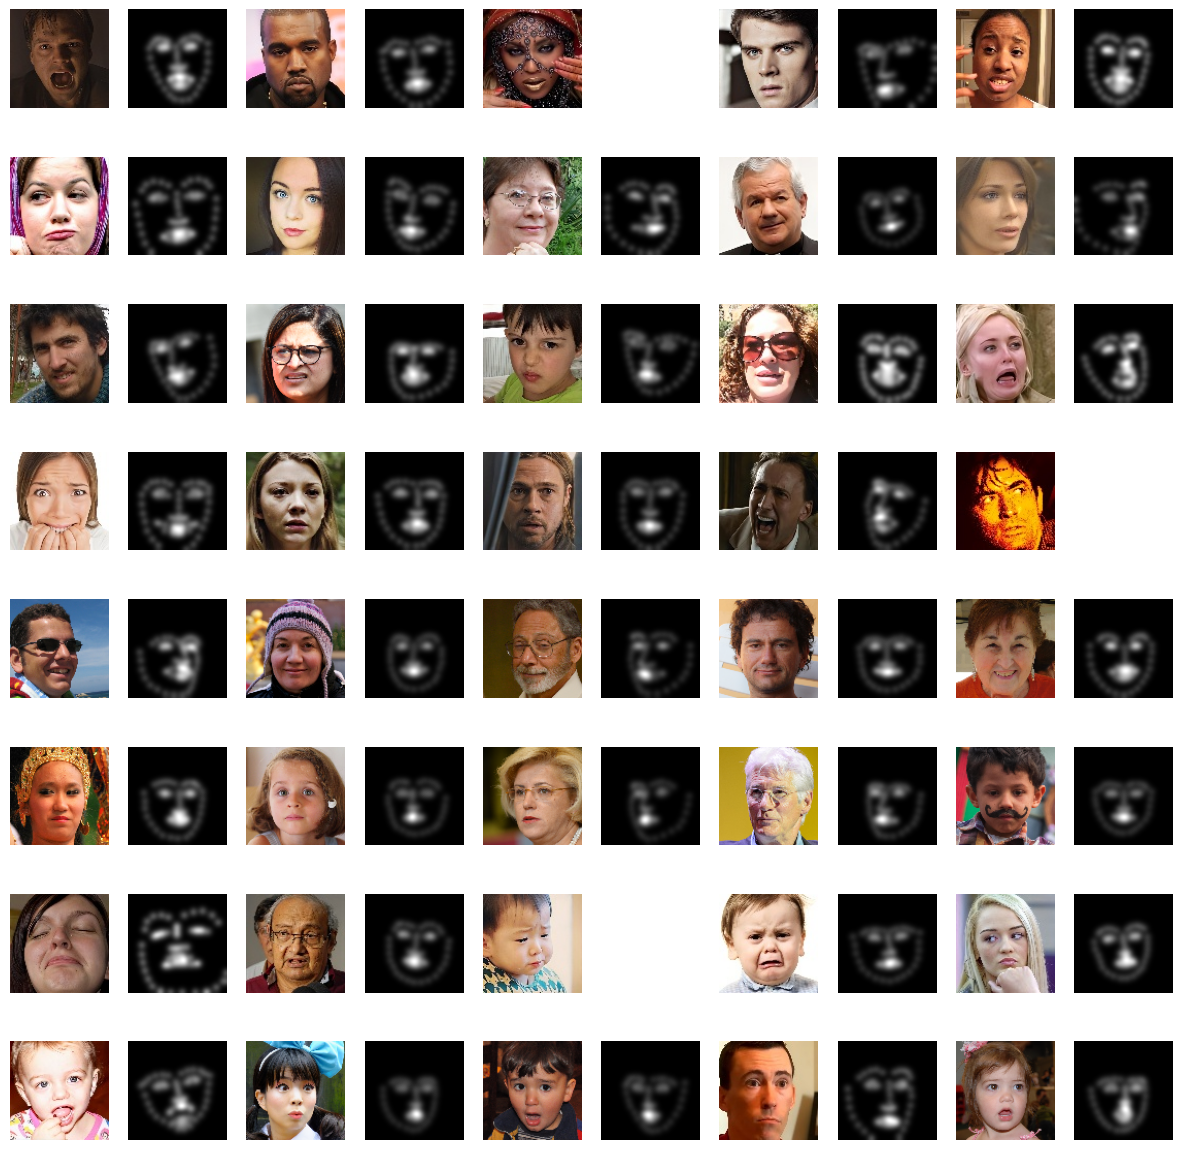

In [10]:
imgs_path = '../datasets/AffectNet'
hm_path = '../datasets/HeatMaps'

plt.figure(figsize=[15,15])

folders = [f for f in os.listdir(imgs_path) if os.path.isdir(os.path.join(imgs_path, f))]
for k, folder in enumerate(folders) : 
    img_folder_path = imgs_path + '/' + folder
    hm_folder_path = hm_path + '/' + folder

    images = [f for f in os.listdir(img_folder_path) if os.path.isfile(os.path.join(img_folder_path, f)) and (f.endswith('.jpg') or f.endswith('.png'))]
    HMs = [f for f in os.listdir(hm_folder_path) if os.path.isfile(os.path.join(hm_folder_path, f)) and f.endswith('.npy')]

    for i, img in enumerate(random.sample(range(1, 1000), 5)) :
        
        image_path = img_folder_path +'/' + images[img]
        image = cv2.imread(image_path)
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

        heatmap_path = hm_folder_path + '/' + HMs[img]
        heatmap = np.load(heatmap_path)

        plt.subplot(8,10,2*i+1 +10*k)
        plt.axis("off")
        plt.imshow(image)

        plt.subplot(8,10,2*i+2 +10*k)
        plt.axis("off")
        plt.imshow(heatmap, cmap=plt.cm.gray)
        

In [12]:
image.shape

(96, 96, 3)